Tarushi Kapoor , tarushikapoor.24@gmail.com ,  Delhi, India 


Machine Learning Engineer Intern , AI Tech Systems , www.ai-techsystems.com 

My project is: Apply k-means clustering to this dataset (k=10). Analyze the clusters and common properties found for each cluster with dataset at https://www.kaggle.com/moltean/fruits (ignore labels)


In [1]:
import os
import random
import pathlib
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


In [2]:
dirc = 'fruits-360/'
y_orig = []
x_orig = []
for f in os.listdir(dirc + 'Training'):
    for i in os.listdir(dirc + 'Training/' + f):
        X = imread(dirc + 'Training/' + f + '/' + i)
        x_orig.append(X)
        y_orig.append(f)
        break

In [3]:
len(x_orig)

118

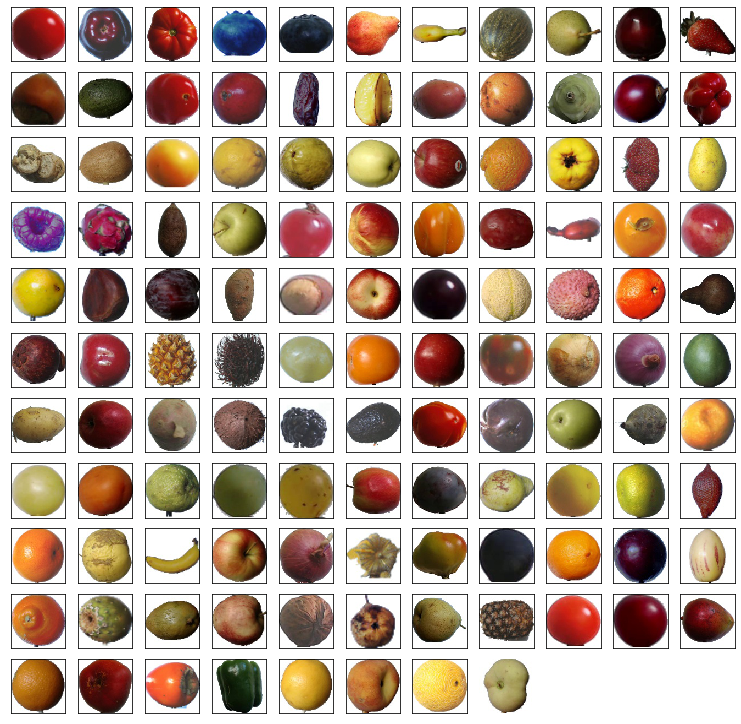

In [4]:
fig = plt.figure(figsize = (13, 13))   # plotting each type of fruit
for i in range(len(x_orig)):
    axs = fig.add_subplot(11, 11, i+1)
    axs.imshow(x_orig[i])
    plt.xticks([])
    plt.yticks([])
plt.axis('off')
plt.show()

In [5]:
path = pathlib.Path(dirc + 'Training') # path of the training folder
trainPaths = list(path.glob('*/*'))
trainPaths = [str(path) for path in trainPaths]
random.shuffle(trainPaths)

In [6]:
len(trainPaths)

59328

In [7]:
def getFeatureList(paths, model):
    v_feature_list = []
    count = 0
    print(len(paths))
    for imgPath in paths:
        img = image.load_img(imgPath, target_size = (224, 224))
        idata = image.img_to_array(img)
        idata = np.expand_dims(idata, axis = 0)
        idata = preprocess_input(idata)
        v_feature = model.predict(idata)
        v_np = np.array(v_feature)
        v_feature_list.append(v_np.flatten())
        count+=1
        if (count%5000==0):
            print(count)
    v_np_list = np.array(v_feature_list)
    return v_np_list

In [8]:
model = VGG16(weights = 'imagenet', include_top = False)   # using pretrained keras model
trainData = getFeatureList(trainPaths, model)
np.save('trainData.npy', trainData)   # saving files for future use

W0817 01:24:09.495546 4532942272 deprecation_wrapper.py:119] From /Applications/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 01:24:09.591567 4532942272 deprecation_wrapper.py:119] From /Applications/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 01:24:09.618487 4532942272 deprecation_wrapper.py:119] From /Applications/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0817 01:24:09.685956 4532942272 deprecation_wrapper.py:119] From /Applications/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecate

59328
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000


In [9]:
def reduceData(data, p):
    frames = []
    for i in range(0, len(data), 10000):
        x = p.fit_transform(data[i: i + 10000, :])
        df = pd.DataFrame(x)
        frames.append(df)
    result = pd.concat(frames)
    return result

In [11]:
pca = PCA(n_components = 2)
Xtrain = reduceData(trainData, pca)   # implementing PCA on training dataset
Xtrain.shape

(59328, 2)

In [17]:
kmeans = KMeans(init = 'k-means++', n_clusters = 10, max_iter = 500)   
kmeans.fit(Xtrain)   # implementing K-means on training set

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
Ytrain = kmeans.labels_   # assigning labels of images in the clusters
Ytrain.shape

(59328,)

In [19]:
for i in range(len(set(kmeans.labels_))):
    x = (kmeans.labels_== i)
    print(f'the number of images in {i} cluster is =', list(x).count(True))

the number of images in 0 cluster is = 6443
the number of images in 1 cluster is = 7337
the number of images in 2 cluster is = 7265
the number of images in 3 cluster is = 5738
the number of images in 4 cluster is = 6909
the number of images in 5 cluster is = 5051
the number of images in 6 cluster is = 6469
the number of images in 7 cluster is = 4572
the number of images in 8 cluster is = 6857
the number of images in 9 cluster is = 2687


In [28]:
def plotClusters(X, Y, centers, name):
    fig = plt.figure(figsize = (10, 7))
    plt.scatter(X.iloc[:, 0],X.iloc[:, 1], c = Y, s = 1)
    plt.scatter(centers[:, 0], centers[:, 1], marker = 'o', s = 50, linewidths = 2, color = 'black', label = 'Centroid')
    plt.title('K-means Clustering : Fruit dataset (PCA-reduced)')
    plt.xlabel('Principle Component 1') 
    plt.ylabel('Principle Component 2') 
    plt.tight_layout()
    plt.legend()
    plt.show()
    fig.savefig(name)

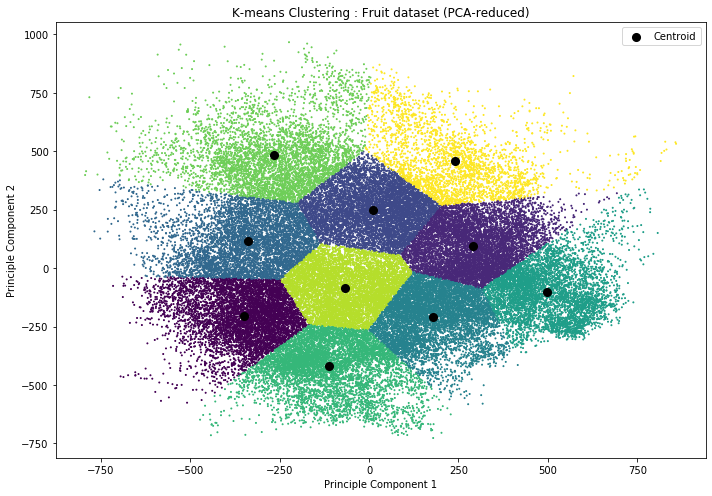

In [29]:
centers = kmeans.cluster_centers_   # getting centroids
plotClusters(Xtrain, Ytrain, centers,'training plot')   # plotting clusters of training set

/Applications/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


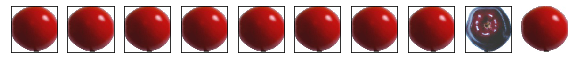

In [94]:
#images of various clusters
fig = plt.figure(figsize = (10, 10))   
for i in range(len(set(Ytrain))):
    x = (Ytrain == i)
    axs = fig.add_subplot(10, 10, i+1)
    axs.imshow(x_orig[x[109]])
    plt.xticks([])
    plt.yticks([])
plt.axis('off')
plt.show()
    